# Trends
By Evgenia "Jenny" Nitishinskaya and Delaney Granizo-Mackenzie

Notebook released under the Creative Commons Attribution 4.0 License.

---

Trends estimate tendencies in data over time, such as overall rising or falling amid noise. They use only historical data and not any knowledge about the processes generating them.

# Linear trend models

A linear trend model assumes that the variable changes at a constant rate with time, and attempts to find a line of best fit. We want to find coefficients $b_0$, $b_1$ such that the series $y_t$ satisfies
$$ y_t = b_0 + b_1t + \epsilon_t $$
and so that the sum of the squares of the errors $\epsilon_t$ is minimized. This can be done using a linear regression. After we have fitted a linear model to our data, we predict the value of the variable to be $y_t = b_0 + b_1 t$ for future time periods $t$. We can also use these parameters to compare the rates of growth or decay of two data series.

Let's find a linear trend model for the price of XLY, an ETF for consumer goods.

In [ ]:
import numpy as np
import math
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt

[2015-06-17 18:33:54.852354] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:33:54.853090] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-17 18:33:54.853612] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:33:54.854157] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-17 18:33:54.855192] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:33:54.855716] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-17 18:33:54.856299] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:33:54.856788] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-17 18:33:54.857276] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:33:54.857765] DEBUG: root: Exit SimpleTable.data2rows.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Security(19662 [XLY])   R-squared:                       0.944
Model:                               OLS   Adj. R-squared:                  0.944
Method:                    Least Squares   F-statistic:                 2.127e+04
Date:                   Wed, 17 Jun 2015   Prob (F-statistic):               0.00
Time:                           18:33:54   Log-Likelihood:                -3168.7
No. Observations:                   1258   AIC:                             6341.
Df Residuals:                       1256   BIC:                             6352.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         26.5739      0.169    156.852      0.000        26.242    26.906
x1             0.0340      0.000    145.846      0.000         0.034     0.034
==============================================================================
Omnibus:                      185.497   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.107
Skew:                          -0.236   Prob(JB):                     1.08e-12
Kurtosis:                       2.090   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

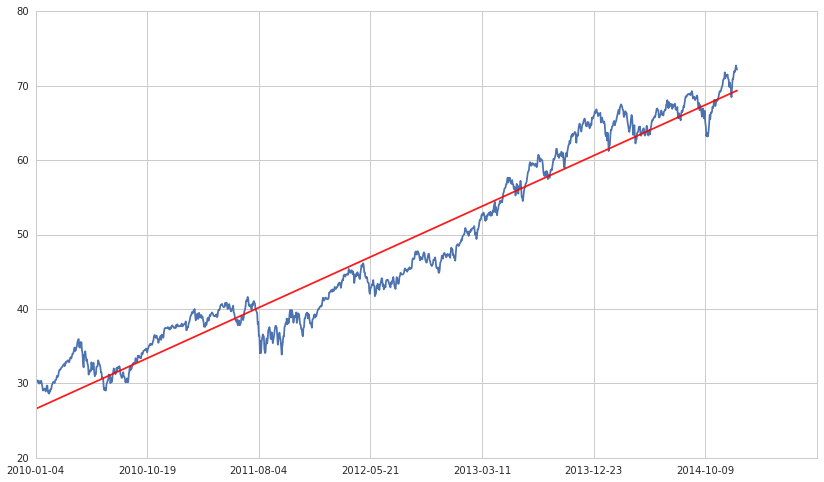

In [227]:
start = '2010-01-01'
end = '2015-01-01'
asset = get_pricing('XLY', fields='price', start_date=start, end_date=end)
dates = asset.index

def linreg(X,Y):
    # Running the linear regression
    x = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, x).fit()
    a = model.params[0]
    b = model.params[1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    return model.summary()

_, ax = plt.subplots()
ax.plot(asset)
ticks = ax.get_xticks()
ax.set_xticklabels([dates[i].date() for i in ticks[:-1]]) # Label x-axis with dates
linreg(np.arange(len(asset)), asset)

The summary returned by the regression tells us the slope and intercept of the line, as well as giving us some information about how statistically valid the fit is. Note that the Durbin-Watson statistic is very low here, suggeesting that the errors are correlated. The price of this fund is generally increasing, but because of the variance in the data, the line of best fit changes significantly depending on the sample we take. Because small errors in our model magnify with time, its predictions far into the future may not be as good as the fit statistics would suggest. For instance, we can see what will happen if we find a model for the data through 2012 and use it to predict the data through 2014.

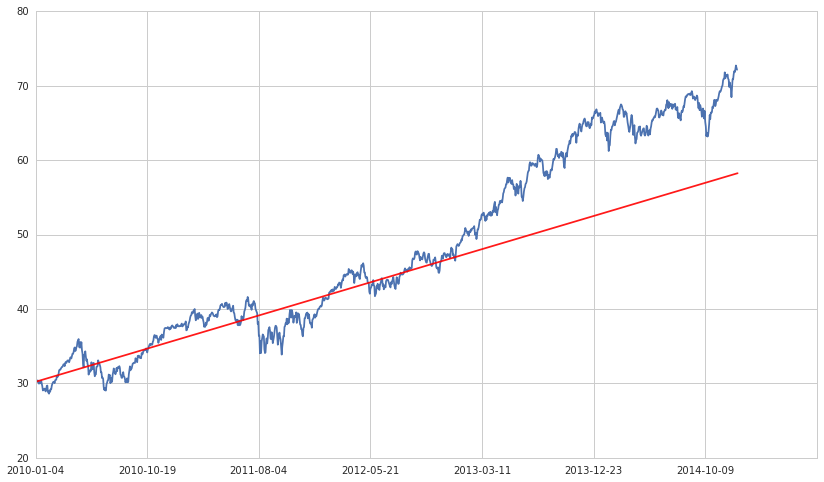

In [311]:
# Take only some of the data in order to see how predictive the model is
asset_short = get_pricing('XLY', fields='price', start_date=start, end_date='2013-01-01')

# Running the linear regression
x = sm.add_constant(np.arange(len(asset_short)))
model = regression.linear_model.OLS(asset_short, x).fit()
X2 = np.linspace(0, len(asset), 100)
Y_hat = X2 * model.params[1] + model.params[0]

# Plot the data for the full time range
_, ax = plt.subplots()
ax.plot(asset)
ticks = ax.get_xticks()
ax.set_xticklabels([dates[i].date() for i in ticks[:-1]]) # Label x-axis with dates

# Plot the regression line extended to the full time range
ax.plot(X2, Y_hat, 'r', alpha=0.9); 

Of course, we can keep updating our model as we go along. Below we use all the previous prices to predict  prices 30 days into the future.

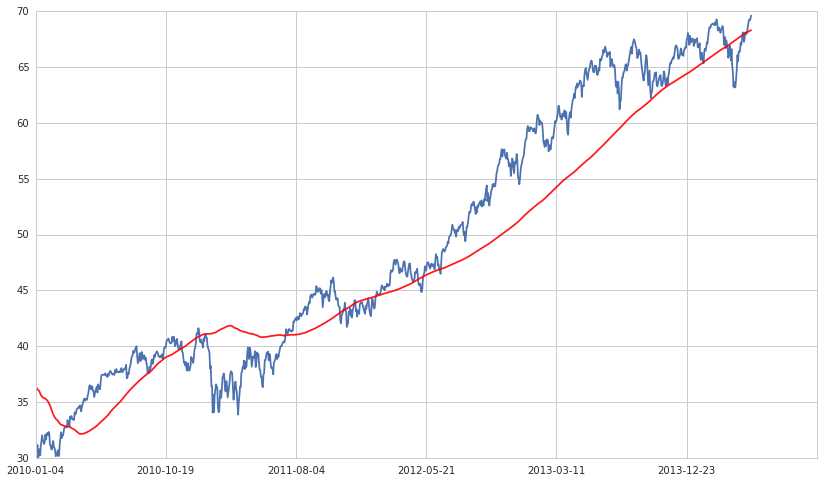

In [309]:
# Y_hat will be our predictions for the price
Y_hat = [0]*1100

# Start analysis from day 100 so that we have historical prices to work with
for i in range(100,1200):
    temp = asset[:i]
    x = sm.add_constant(np.arange(len(temp)))
    model = regression.linear_model.OLS(temp, x).fit()
    # Plug (i+30) into the linear model to get the predicted price 30 days from now
    Y_hat[i-100] = (i+30) * model.params[1] + model.params[0]

_, ax = plt.subplots()
ax.plot(asset[130:1230]) # Plot the asset starting from the first day we have predictions for
ax.plot(range(len(Y_hat)), Y_hat, 'r', alpha=0.9)
ticks = ax.get_xticks()
ax.set_xticklabels([dates[i].date() for i in ticks[:-1]]) # Label x-axis with dates;

# Log-linear trend models

A log-linear trend model attempts to fit an exponential curve to a data set:
$$ y_t = e^{b_0 + b_1 t + \epsilon_t} $$

To find the coefficients, we can run a linear regression on the equation $ \ln y_t = b_0 + b_1 t + \epsilon_t $ with variables $t, \ln y_t$. (This is the reason for the name of the model — the equation is linear when we take the logarithm of both sides!)

If $b_1$ is very small, then a log-linear curve is approximately linear. For instance, we can find a log-linear model for our data from the previous example, with fit statistics approximately the same as for the linear model.

[2015-06-17 18:09:46.847271] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:09:46.848002] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-17 18:09:46.848535] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:09:46.849075] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-17 18:09:46.850109] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:09:46.850651] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-17 18:09:46.851241] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:09:46.851741] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-17 18:09:46.852235] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:09:46.852717] DEBUG: root: Exit SimpleTable.data2rows.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Security(19662 [XLY])   R-squared:                       0.959
Model:                               OLS   Adj. R-squared:                  0.959
Method:                    Least Squares   F-statistic:                 2.913e+04
Date:                   Wed, 17 Jun 2015   Prob (F-statistic):               0.00
Time:                           18:09:46   Log-Likelihood:                 1890.5
No. Observations:                   1258   AIC:                            -3777.
Df Residuals:                       1256   BIC:                            -3767.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.3868      0.003   1115.335      0.000         3.381     3.393
x1             0.0007   4.18e-06    170.663      0.000         0.001     0.001
==============================================================================
Omnibus:                       36.939   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.844
Skew:                          -0.186   Prob(JB):                     1.10e-05
Kurtosis:                       2.454   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

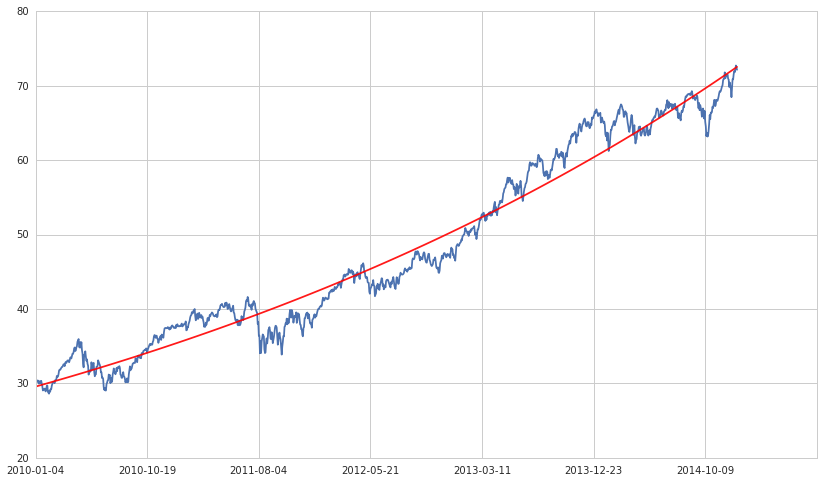

In [189]:
def loglinreg(X,Y):
    # Running the linear regression on X, log(Y)
    x = sm.add_constant(X)
    model = regression.linear_model.OLS(np.log(Y), x).fit()
    a = model.params[0]
    b = model.params[1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = (math.e)**(X2 * b + a)
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression curve, colored in red
    return model.summary()

_, ax_log = plt.subplots()
ax_log.plot(asset)
ax_log.set_xticklabels([dates[i].date() for i in ticks[:-1]]) # Label x-axis with dates
loglinreg(np.arange(len(asset)), asset)

In some cases, however, a log-linear model clearly fits the data better.

[2015-06-17 18:13:08.261281] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:13:08.262012] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-17 18:13:08.262557] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:13:08.263098] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-17 18:13:08.264120] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:13:08.264835] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-17 18:13:08.265443] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:13:08.265926] DEBUG: root: Exit SimpleTable.data2rows.
[2015-06-17 18:13:08.266430] DEBUG: root: Enter SimpleTable.data2rows.
[2015-06-17 18:13:08.266916] DEBUG: root: Exit SimpleTable.data2rows.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Security(24 [AAPL])   R-squared:                       0.935
Model:                             OLS   Adj. R-squared:                  0.935
Method:                  Least Squares   F-statistic:                 3.783e+04
Date:                 Wed, 17 Jun 2015   Prob (F-statistic):               0.00
Time:                         18:13:08   Log-Likelihood:                -876.59
No. Observations:                 2624   AIC:                             1757.
Df Residuals:                     2622   BIC:                             1769.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0634      0.013      4.807      0.000         0.038     0.089
x1             0.0017   8.71e-06    194.500      0.000         0.002     0.002
==============================================================================
Omnibus:                     1022.810   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.228
Skew:                           0.179   Prob(JB):                     2.91e-32
Kurtosis:                       1.905   Cond. No.                     3.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

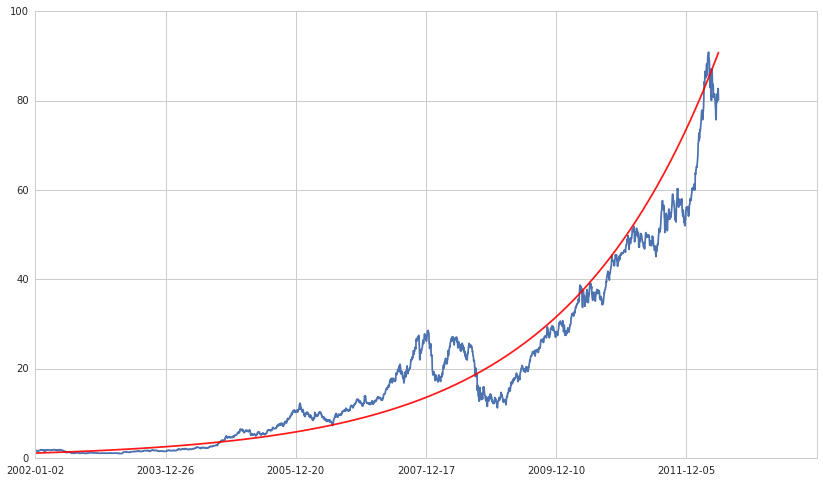

In [193]:
start2 = '2002-01-01'
end2 = '2012-06-01'
asset2 = get_pricing('AAPL', fields='price', start_date=start2, end_date=end2)
dates2 = asset2.index

_, ax2 = plt.subplots()
ax2.plot(asset2)
ticks2 = ax2.get_xticks()
ax2.set_xticklabels([dates2[i].date() for i in ticks2[:-1]]) # Label x-axis with dates
loglinreg(np.arange(len(asset2)), asset2)

# Summary

From the above we see that trend models can provide a simple representation of a complex data series. However, the errors (deviations from the model) are highly correlated; so, we cannot apply the usual regression statistics to test for correctness, since the regression model assumes serially uncorrelated errors. This also suggests that the correlation can be used to build a finer model.